In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
features = pd.read_csv("../../results/features.csv", index_col = 0)

In [12]:
features

,id,n_trial,magnitude,n_perturbation,basline_hr,max_hr,min_hr,std_hr,baseline_vo2,max_vo2,min_vo2,std_vo2,baseline_vco2,max_vo2.1,min_vo2.1,std_vo2.1,baseline_ve,max_ve,min_ve,std_ve
0,1.0,2.0,0.6,0.0,87.775395,0.105646,-0.022234,3.685475,0.864863,0.117258,-0.204196,0.087770,0.672987,0.103772,-0.200928,0.065676,24.814260,0.399374,-0.435894,3.495611
1,1.0,2.0,0.6,1.0,87.493398,0.077196,0.012766,1.674660,0.743746,0.581363,-0.107862,0.146175,0.603548,0.544822,-0.063141,0.097607,20.810855,1.082147,-0.294048,5.631207
2,1.0,2.0,0.6,2.0,88.466737,0.088141,-0.008355,2.849229,0.835216,0.200608,-0.212473,0.103917,0.689777,0.183956,-0.215716,0.079907,25.369910,0.290232,-0.596639,4.755927
3,1.0,2.0,0.6,3.0,97.492866,0.037630,-0.028046,1.781402,0.766836,0.285323,-0.123173,0.094428,0.678830,0.202738,-0.143383,0.072399,24.392251,0.320729,-0.343033,3.876933
4,1.0,2.0,0.6,4.0,96.512740,0.060636,-0.034400,2.659584,0.811782,0.117969,-0.186001,0.074234,0.706091,0.087719,-0.206552,0.062735,26.412017,0.344564,-0.660289,4.435220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,5.0,6.0,0.4,4.0,103.019431,0.024383,-0.033559,1.849261,0.811681,0.092272,-0.291680,0.097189,0.642254,0.033822,-0.274997,0.057331,25.177514,0.005941,-0.441430,3.016388
265,5.0,6.0,0.4,5.0,103.178026,0.010131,-0.071379,2.459516,0.640793,0.356599,-0.090852,0.081376,0.522363,0.248523,-0.086040,0.048227,20.547973,0.224070,-0.497628,2.898483
266,5.0,6.0,0.4,6.0,98.352053,0.075559,0.005684,1.776955,0.724971,0.039822,-0.271788,0.066615,0.570794,0.027404,-0.278513,0.053055,22.319123,0.277613,-0.710389,4.068026
267,5.0,6.0,0.4,7.0,99.600560,0.049557,-0.003031,1.348549,0.768477,0.082940,-0.164681,0.063326,0.622873,0.060576,-0.160565,0.047619,23.593783,0.176908,-0.652936,3.671875


In [13]:
f1 = features[features.id==1.0]
f2 = features[features.id==2.0]
f3 = features[features.id==3.0]
f4 = features[features.id==4.0]
f5 = features[features.id==5.0]

In [14]:
n_participants = len(np.unique(features.id))
participants = np.unique(features.id)

n_columns = 2
n_rows = int(np.ceil(n_participants/2))

## HR vs VO2

<Axes: xlabel='max_hr', ylabel='max_vo2'>

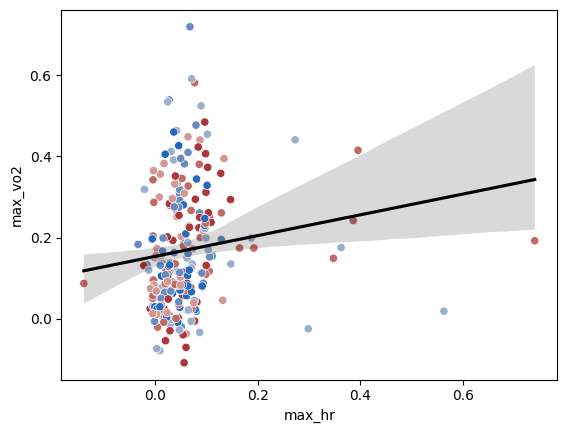

In [15]:
plt.figure()


# Scatterplot with hue as magnitude
sns.scatterplot(data=features, x="max_hr", y="max_vo2",  hue="magnitude",
                    legend=None,palette='vlag')
sns.regplot(data=features,x="max_hr",y="max_vo2",scatter=False,color="black",
    )

### per participants

plot the max increase in hr over the max increase of vo2 per participant

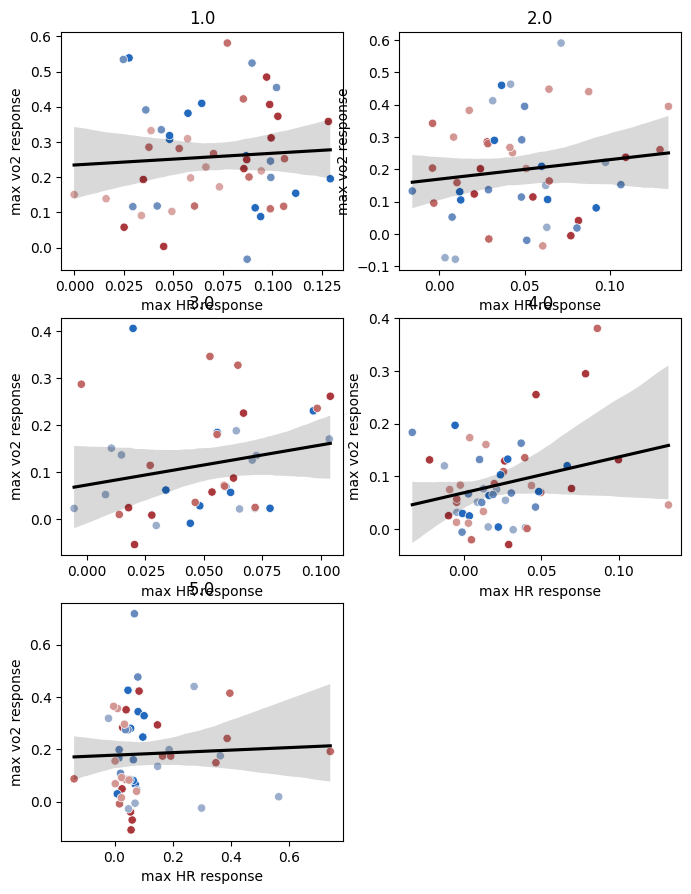

In [16]:
plt.figure(figsize=(8,3.5*n_rows))

for i, p in enumerate(participants):
    plt.subplot(n_rows,n_columns, i+1)
# Scatterplot with hue as magnitude
    sns.scatterplot(data=features[features.id==p], x="max_hr", y="max_vo2",  hue="magnitude", 
                    legend=None,palette='vlag')
    sns.regplot(data=features[features.id==p],x="max_hr",y="max_vo2",scatter=False,color="black",
    )
    plt.xlabel('max HR response')
    plt.ylabel('max vo2 response')
    plt.title(p)


### per magnitude

In [17]:
n_magnitudes = len(np.unique(features.magnitude))
magnitudes = np.unique(features.magnitude)

n_columns = 2
n_rows = int(np.ceil(n_magnitudes/2))

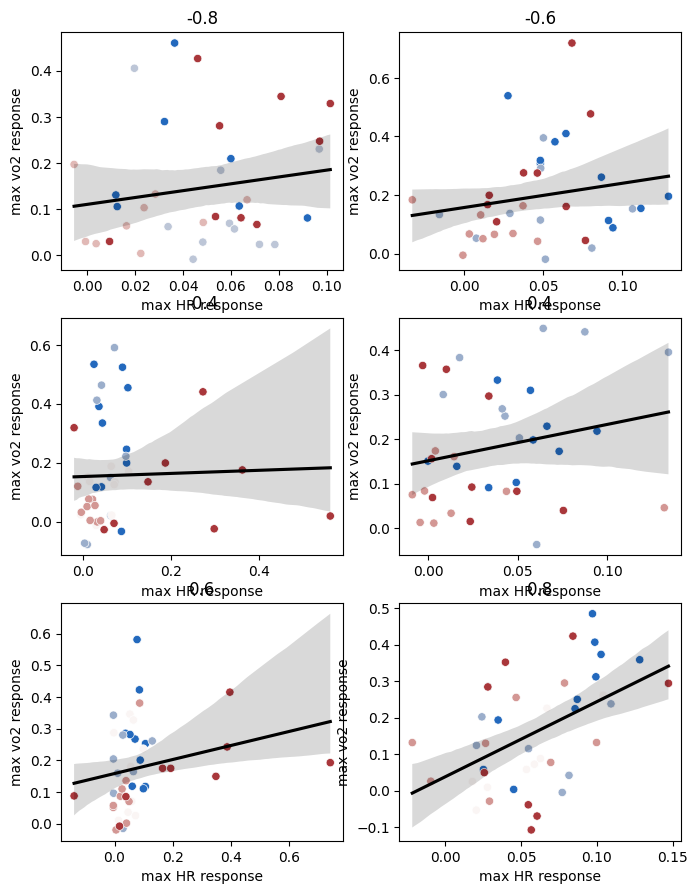

In [18]:
plt.figure(figsize=(8,3.5*n_rows))

for i, p in enumerate(magnitudes):
    plt.subplot(n_rows,n_columns, i+1)
# Scatterplot with hue as magnitude
    sns.scatterplot(data=features[features.magnitude==p], x="max_hr", y="max_vo2",  hue="id",
                    legend=None,palette='vlag')
    sns.regplot(data=features[features.magnitude==p],x="max_hr",y="max_vo2",scatter=False,color="black",
    )
    plt.xlabel('max HR response')
    plt.ylabel('max vo2 response')
    plt.title(p)

Text(0.5, 0, 'perturbation magnitude')

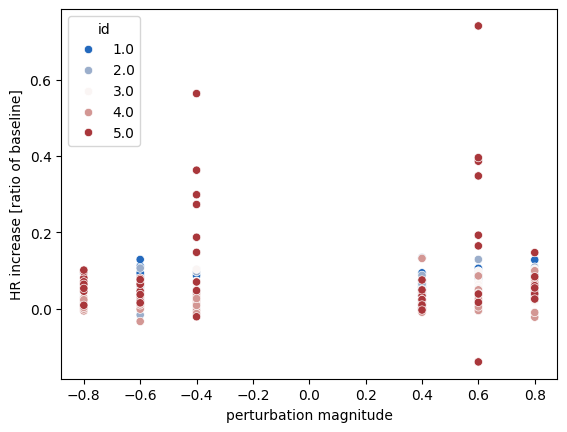

In [19]:
plt.figure()

# Scatterplot with hue as magnitude
sns.scatterplot(data=features, x="magnitude", y="max_hr",  hue="id", palette='vlag')
#sns.regplot(data=features,x="baseline_vo2",y="min_vo2",scatter=False,color="black"
#)
plt.ylabel('HR increase [ratio of baseline]')
plt.xlabel('perturbation magnitude')


Text(0.5, 0, 'perturbation magnitude')

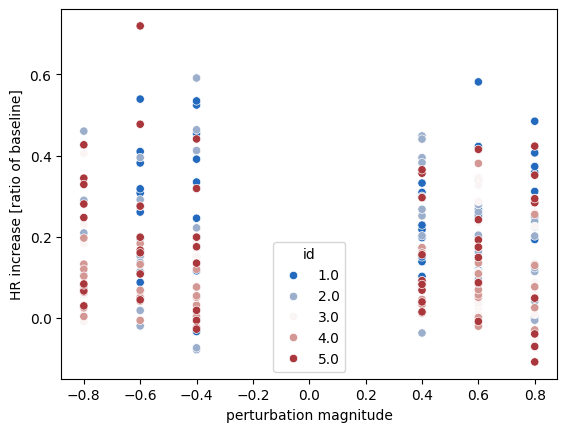

In [20]:
plt.figure()

# Scatterplot with hue as magnitude
sns.scatterplot(data=features, x="magnitude", y="max_vo2",  hue="id", palette='vlag')
#sns.regplot(data=features,x="baseline_vo2",y="min_vo2",scatter=False,color="black"
#)
plt.ylabel('HR increase [ratio of baseline]')
plt.xlabel('perturbation magnitude')

# VO2 - baseline Vo2

Text(0, 0.5, 'max vo2 after perturbation  [fraction of baseline]')

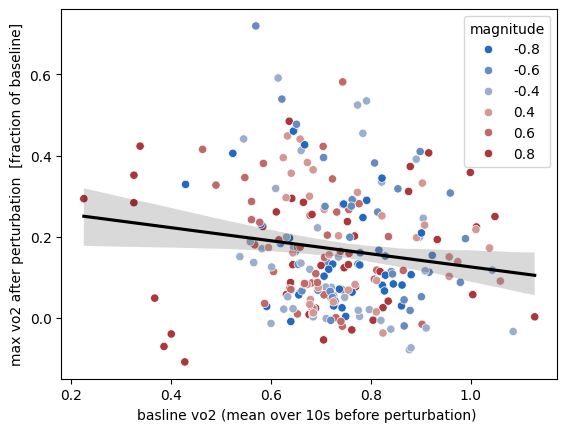

In [21]:
plt.figure()

# Scatterplot with hue as magnitude
sns.scatterplot(data=features, x="baseline_vo2", y="max_vo2",  hue="magnitude", palette='vlag')
sns.regplot(data=features,x="baseline_vo2",y="max_vo2",scatter=False,color="black"
)
plt.xlabel('basline vo2 (mean over 10s before perturbation) ')
plt.ylabel('max vo2 after perturbation  [fraction of baseline]')

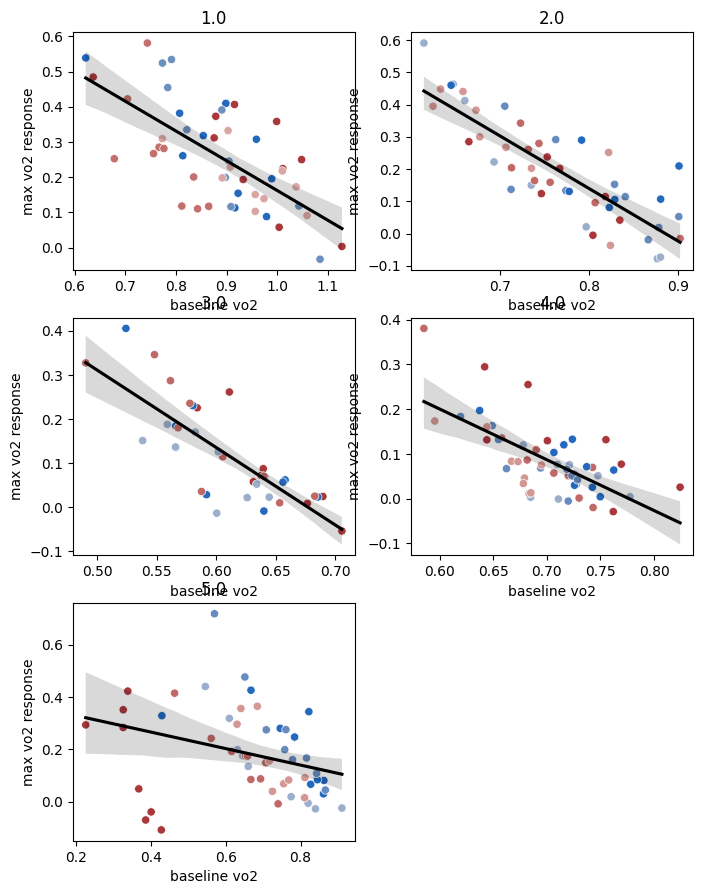

In [22]:
plt.figure(figsize=(8,3.5*n_rows))

for i, p in enumerate(participants):
    plt.subplot(n_rows,n_columns, i+1)
# Scatterplot with hue as magnitude
    sns.scatterplot(data=features[features.id==p], x="baseline_vo2", y="max_vo2",  hue="magnitude", 
                    legend=None,palette='vlag')
    sns.regplot(data=features[features.id==p],x="baseline_vo2",y="max_vo2",scatter=False,color="black",
    )
    plt.xlabel('baseline vo2')
    plt.ylabel('max vo2 response')
    plt.title(p)

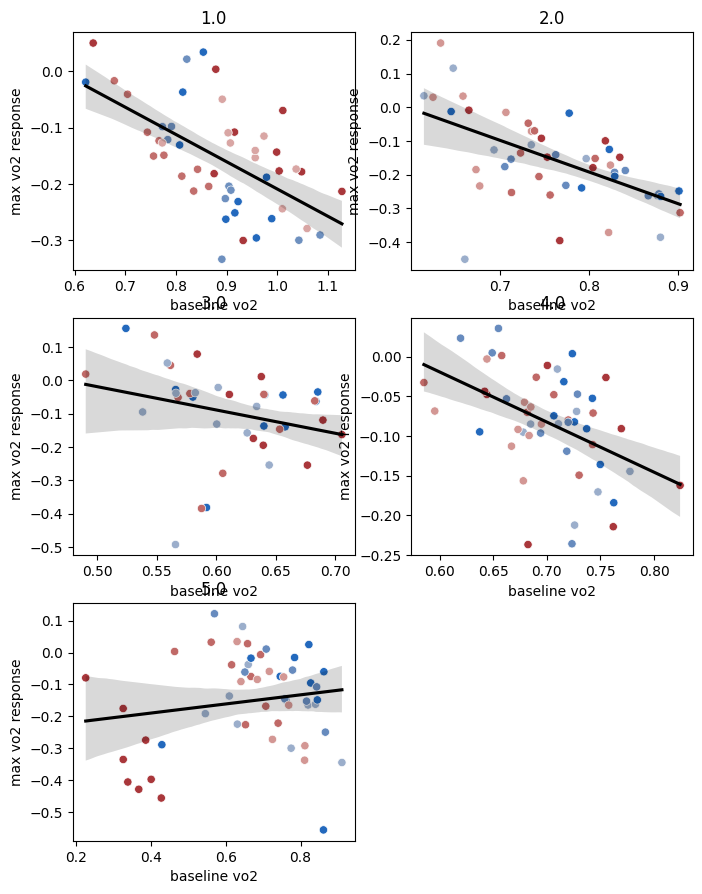

In [23]:
plt.figure(figsize=(8,3.5*n_rows))

for i, p in enumerate(participants):
    plt.subplot(n_rows,n_columns, i+1)
# Scatterplot with hue as magnitude
    sns.scatterplot(data=features[features.id==p], x="baseline_vo2", y="min_vo2",  hue="magnitude", 
                    legend=None,palette='vlag')
    sns.regplot(data=features[features.id==p],x="baseline_vo2",y="min_vo2",scatter=False,color="black",
    )
    plt.xlabel('baseline vo2')
    plt.ylabel('max vo2 response')
    plt.title(p)

# HR - baseline HR

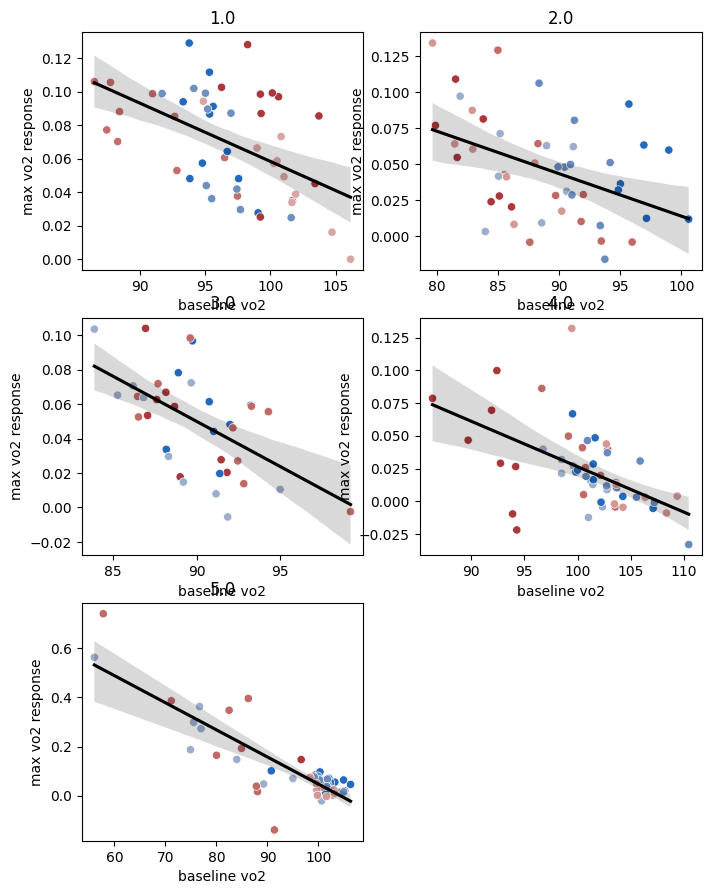

In [24]:
plt.figure(figsize=(8,3.5*n_rows))

for i, p in enumerate(participants):
    plt.subplot(n_rows,n_columns, i+1)
# Scatterplot with hue as magnitude
    sns.scatterplot(data=features[features.id==p], x="basline_hr", y="max_hr",  hue="magnitude", 
                    legend=None,palette='vlag')
    sns.regplot(data=features[features.id==p],x="basline_hr",y="max_hr",scatter=False,color="black",
    )
    plt.xlabel('baseline vo2')
    plt.ylabel('max vo2 response')
    plt.title(p)

### more analyses can be done of course!